In [1]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
#from Functions import *
%run -i "Functions.py"

In [2]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
number_of_nodes = len(np.unique(male)) + len(np.unique(female))
"""dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net = nx.from_numpy_array(adj)"""

'dim = max(female.max(), male.max())+1\nadj = np.zeros((dim,dim))\nfor i,j in zip(female,male):\n    adj[i,j] = 1\n    adj[j,i] = 1\nnet = nx.from_numpy_array(adj)'

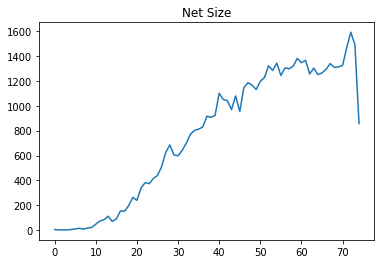

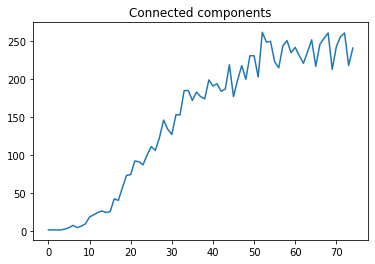

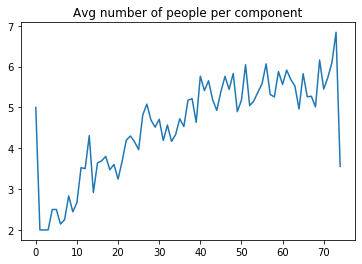

In [3]:
net_list, agg = temporal_network_list(female, male, time, 30)
net_size=[]
connected_comp = []

for net in net_list:
    net_size.append(len(list(net.nodes)))
    connected_comp.append(nx.number_connected_components(net))


plt.plot(net_size)
plt.title("Net Size")
plt.show()

plt.plot(connected_comp)
plt.title("Connected components")
plt.show()

plt.plot(np.divide(net_size, connected_comp))
plt.title("Avg number of people per component")
plt.show()

In [4]:
# %% disease parameters
params = [0.1, 0.01, 1e-02, 1e-04]
tmax = 10000 # days
aggregation = 30 # days
rho = 1
t_initial_seed = 20
p_infected = 1e-03
excl_fraction = 5/7

net_list, agg = temporal_network_list(female, male, time, aggregation)

In [2]:
a=[3,6,9]
param=[]
for i in [1,2,3]:
    for j in a:
        param.append(j*10**-i)
print(param)

[0.30000000000000004, 0.6000000000000001, 0.9, 0.03, 0.06, 0.09, 0.003, 0.006, 0.009000000000000001]


In [11]:
results = []
for beta in params:
    for mu in params:
        print("\nbeta = {:.4f} | mu = {:.4f}".format(beta, mu))
        S, I, T = SIS_temporal(net_list, agg, tmax=tmax, beta=beta, mu=mu, rho=rho, p_infected=p_infected, t_initial_seed=t_initial_seed, exclude_fraction=excl_fraction)
        results.append([beta, mu, T, S, I])

beta = [row[0] for row in results]
mu   = [row[1] for row in results] 
time = [row[2] for row in results]
S    = [row[3] for row in results]
I    = [row[4] for row in results]

np.save("SIS_temporal", [mu, beta, T, S, I])

  1%|          | 84/10000 [00:00<00:11, 832.66it/s]


beta = 0.1000 | mu = 0.1000


  2%|▏         | 186/10000 [00:00<00:10, 935.13it/s]


beta = 0.1000 | mu = 0.0100


  2%|▏         | 176/10000 [00:00<00:11, 876.46it/s]


beta = 0.1000 | mu = 0.0010


  2%|▏         | 177/10000 [00:00<00:10, 893.66it/s]


beta = 0.1000 | mu = 0.0001


  2%|▏         | 184/10000 [00:00<00:10, 916.69it/s]


beta = 0.0100 | mu = 0.1000


  2%|▏         | 184/10000 [00:00<00:10, 921.09it/s]


beta = 0.0100 | mu = 0.0100


  2%|▏         | 184/10000 [00:00<00:10, 925.21it/s]


beta = 0.0100 | mu = 0.0010


  2%|▏         | 184/10000 [00:00<00:10, 919.56it/s]


beta = 0.0100 | mu = 0.0001


  2%|▏         | 184/10000 [00:00<00:10, 914.56it/s]


beta = 0.0010 | mu = 0.1000


  2%|▏         | 174/10000 [00:00<00:11, 870.74it/s]


beta = 0.0010 | mu = 0.0100


  2%|▏         | 180/10000 [00:00<00:10, 893.36it/s]


beta = 0.0010 | mu = 0.0010


  2%|▏         | 184/10000 [00:00<00:10, 916.51it/s]


beta = 0.0010 | mu = 0.0001


  2%|▏         | 185/10000 [00:00<00:10, 923.41it/s]


beta = 0.0001 | mu = 0.1000


  2%|▏         | 184/10000 [00:00<00:10, 924.16it/s]


beta = 0.0001 | mu = 0.0100


  2%|▏         | 182/10000 [00:00<00:10, 909.60it/s]


beta = 0.0001 | mu = 0.0010


  2%|▏         | 182/10000 [00:00<00:10, 905.90it/s]


beta = 0.0001 | mu = 0.0001


100%|██████████| 10000/10000 [00:25<00:00, 390.66it/s]


In [ ]:
"""fare il load"""
_=[]

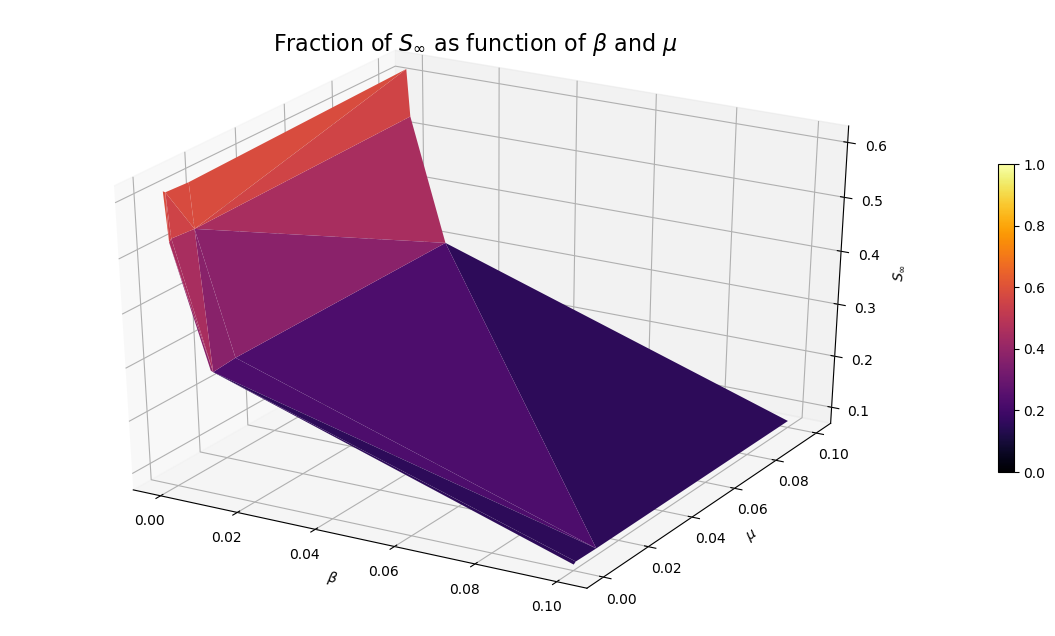

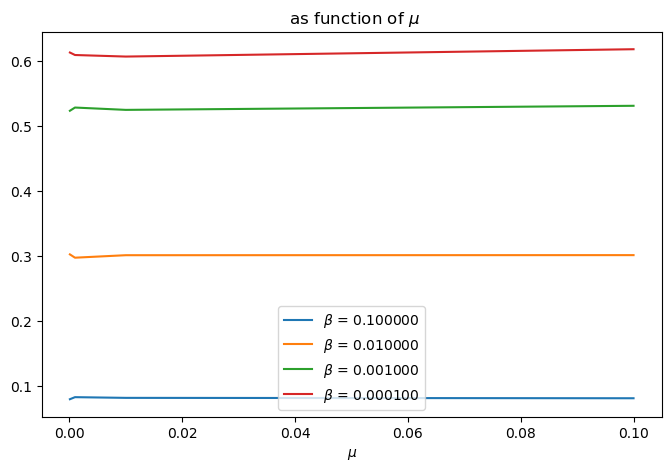

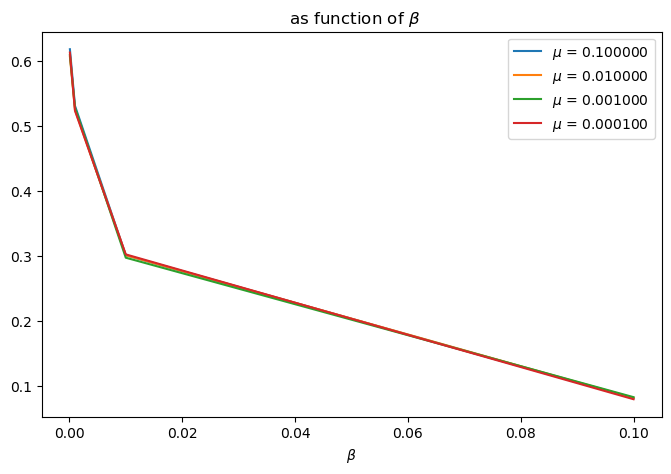

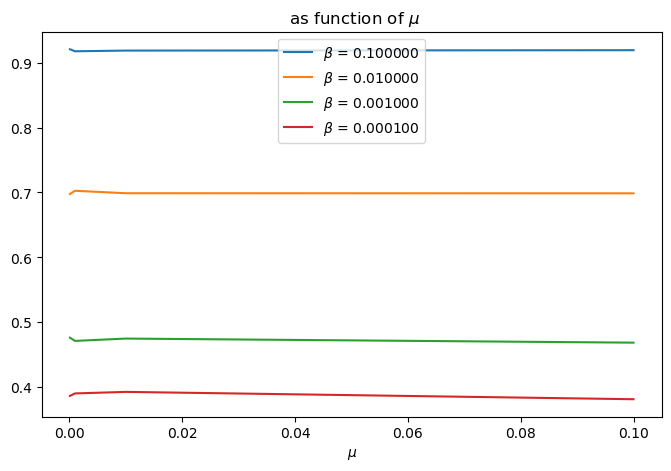

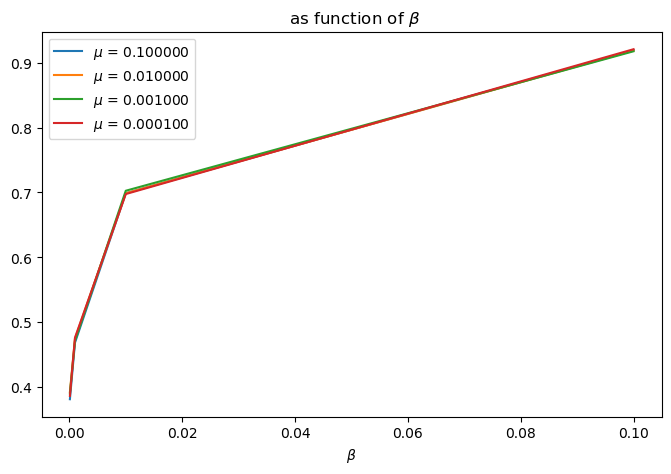

([[array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.91900777, 0.91841004, 0.91733413, 0.92050209])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.698685  , 0.69880454, 0.70263001, 0.69754931])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.46879857, 0.47507472, 0.47148834, 0.47644949])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.3817095 , 0.39300658, 0.39061566, 0.3867902 ])]],
 [[array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.91900777, 0.698685  , 0.46879857, 0.3817095 ])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.91841004, 0.69880454, 0.47507472, 0.39300658])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.91733413, 0.70263001, 0.47148834, 0.39061566])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.92050209, 0.69754931, 0.47644949, 0.3867902 ])]])

In [12]:
S_inf, I_inf = S_R_inf_surfaces(np.array(mu),np.array(beta),time,S,_,I, number_of_nodes)
tagli(np.array(mu), np.array(beta), S_inf, number_of_nodes, params, "", "S")
tagli(np.array(mu), np.array(beta), I_inf, number_of_nodes, params, "", "I")

beta = 0.1 | mu = 0.01


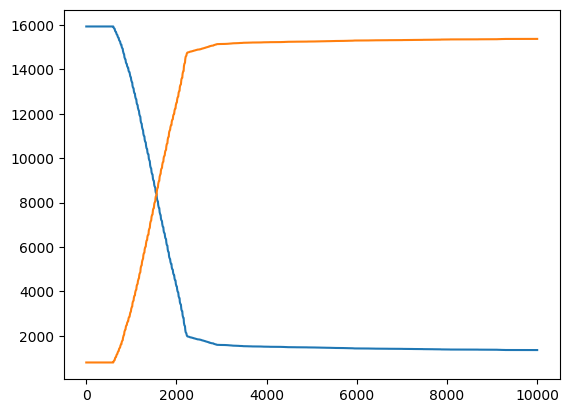

beta = 0.0001 | mu = 0.01


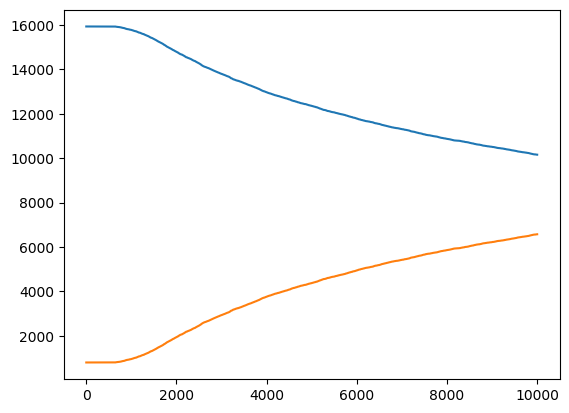

In [13]:
print("beta = {} | mu = {}".format(beta[1], mu[1]))
plt.plot(time[1], S[1])
plt.plot(time[1], I[1])


plt.show()

print("beta = {} | mu = {}".format(beta[13], mu[13]))
plt.plot(time[13], S[13])
plt.plot(time[13], I[13])


In [52]:
S, I, T = SIS_temporal(net_list, agg, tmax=tmax, beta=0.7, mu=0.0005, rho=rho, p_infected=p_infected, t_initial_seed=50, exclude_fraction=excl_fraction)

100%|██████████| 10000/10000 [01:10<00:00, 141.72it/s]


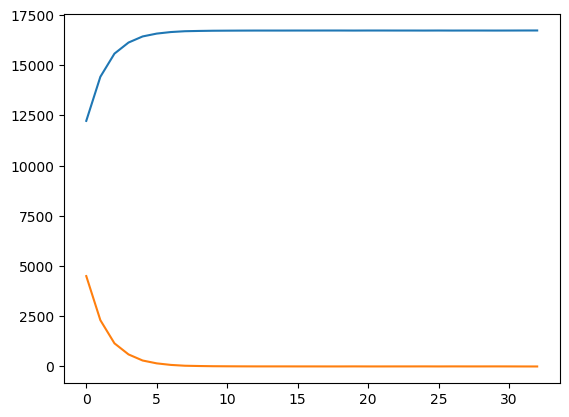

In [51]:
plt.plot(T,S)
plt.plot(T,I)
plt.show()

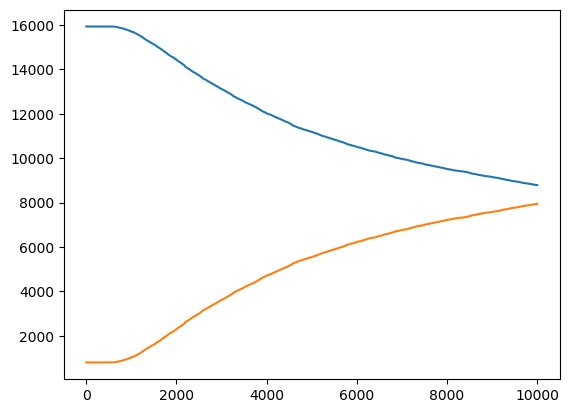

In [23]:
plt.plot(T,S)
plt.plot(T,I)
plt.show()